In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv

In [4]:
def read_csv(file:str):
    with open(file) as f:
        return np.array(list(csv.reader(f, delimiter=' '))[1:], dtype=np.float)
    
matplotlib.rcParams.update({'font.size': 14})

In [5]:
labels = ('Insertion', 'Search-pos', 'Search-neg', 'Delete')
N = len(labels)
fixed_data = read_csv('fp_fixed.csv')
fixed_data = (fixed_data[:,1], fixed_data[:,2])
vl_data = read_csv('fp_vl.csv')
vl_data = (vl_data[:,1], vl_data[:,2])

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fixed_data, vl_data

((array([ 8.785, 38.16 , 29.948, 16.092]),
  array([ 9.24 , 49.558, 58.379, 16.707])),
 (array([ 4.278, 12.862,  7.113, 10.146]),
  array([ 8.01 , 36.368, 55.309, 15.916])))

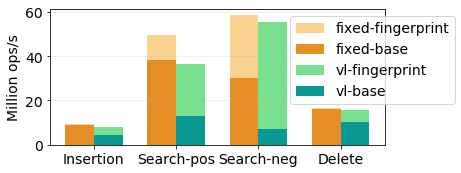

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 2.5, forward=True)
p1 = ax.bar(ind-width/2, fixed_data[0], width, color='#e58e26')
p2 = ax.bar(ind-width/2, fixed_data[1]-fixed_data[0], width, bottom=fixed_data[0], color='#fad390')
p3 = ax.bar(ind+width/2, vl_data[0], width, color='#079992')
p4 = ax.bar(ind+width/2, vl_data[1]-vl_data[0], width, bottom=vl_data[0], color='#78e08f')

plt.ylabel('Million ops/s')
plt.xticks(ind, labels)
plt.legend((p2[0], p1[0], p4[0], p3[0]), ('fixed-fingerprint', 'fixed-base', 'vl-fingerprint', 'vl-base'),
           ncol=1, loc='upper right',bbox_to_anchor=(0.23, 1, 1., 0))
plt.grid(axis='y', alpha=0.25)

plt.show()

In [9]:
fig.savefig('5-fingerprint.pdf', bbox_inches='tight')